## Import libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocess train data

## Load data

In [108]:
df_train = pd.read_csv('../data/raw/train.csv')

## Inspect data

In [109]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
print("shape:", df_train.shape)

shape: (891, 12)


In [111]:
print('info: ', df_train.info())

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB
info:  None


In [112]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

## Data type of each column

In [114]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object

## Number of missing values

In [115]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)
print(missing_values)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


## Key points
- The columns 'Age' and 'Cabin' contains more null values
- 'PassengerId', 'Name' and 'Ticket' doesn't affect 'Survived'. So, we can remove it from the data
- We can remove 'Cabin' from the training data, as there are a lot of missing values in it, 
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values



## Find Duplicates

In [116]:
print(f'Duplicates: {df_train.duplicated().sum()}')

Duplicates: 0


## Extreme Values

In [117]:
df_train.max(numeric_only=True)

PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [118]:
df_train.min(numeric_only=True)

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

## Visualization of 'Survived' 

In [119]:
df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

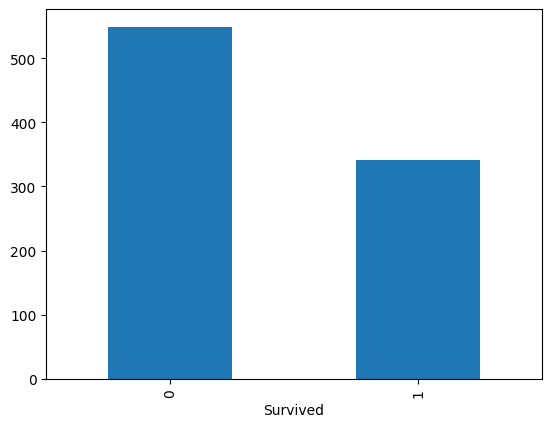

In [120]:
plt = df_train.Survived.value_counts().plot(kind='bar')

## Insight
- majority of passengers couldn't survive.

# Visualization of PClass

Text(4.444444444444452, 0.5, 'Passenger count')

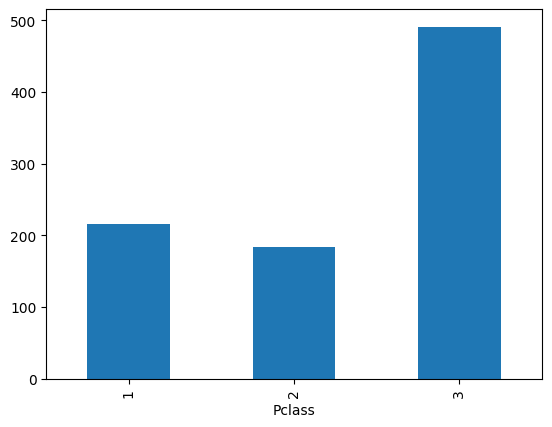

In [121]:
df_train.Pclass.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Passenger count')

In [122]:
df_train[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [123]:
df_train[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survival rate')

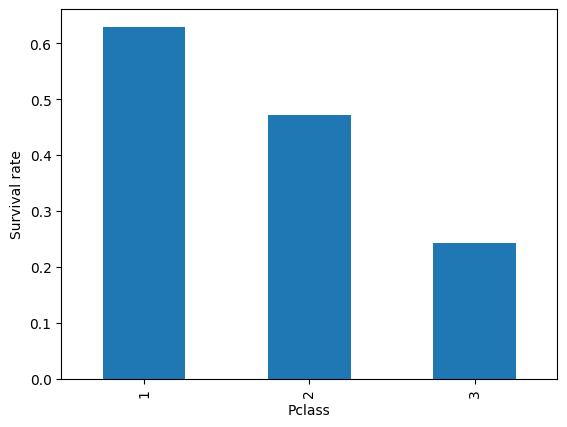

In [124]:
plt = df_train[['Pclass', 'Survived']].groupby('Pclass')['Survived'].mean().plot(kind='bar') # Survival rate mean = sum / count
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival rate')

### Insight
- 1st class has high chance of surviving than the other two

## Sex

Text(0, 0.5, 'Passenger count')

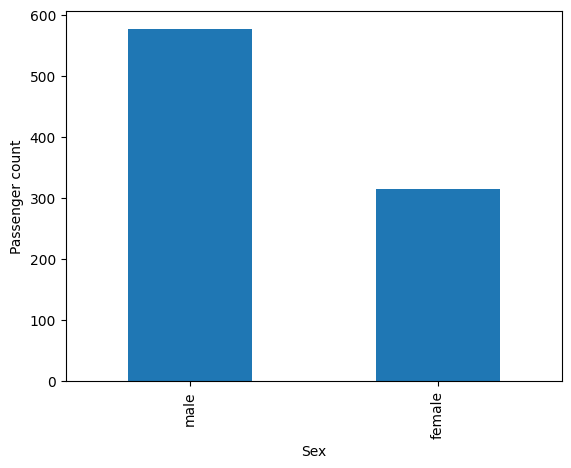

In [125]:
plt = df_train.Sex.value_counts().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

### Sex - Survival probability

Text(0, 0.5, 'Survival Probability')

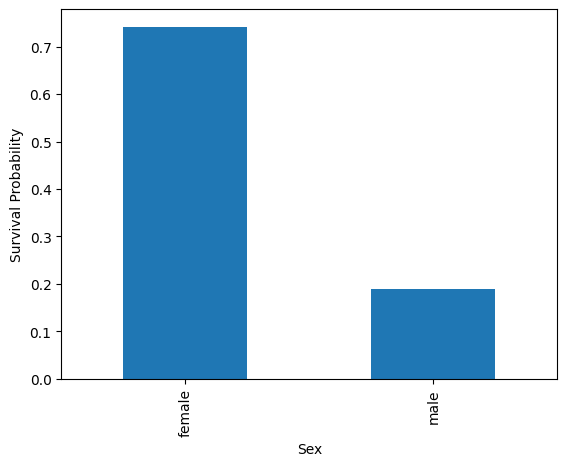

In [126]:
plt = df_train[['Sex', 'Survived']].groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

### Insight
-  The survival probaility for Female is more

## Embarked

Text(0, 0.5, 'Passenger count')

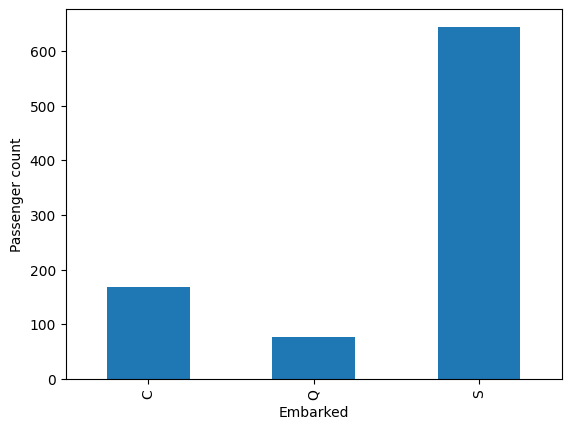

In [127]:
plt = df_train.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

- Most of them are from Southampton(S).

## Embarked - Survival probability

Text(0, 0.5, 'Survival Probability')

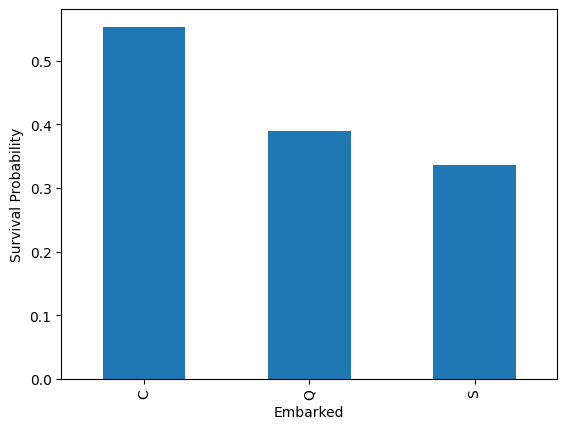

In [128]:
plt = df_train[['Embarked', 'Survived']].groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')


## SibSp - Siblings/Spouse

Text(0, 0.5, 'Passenger count')

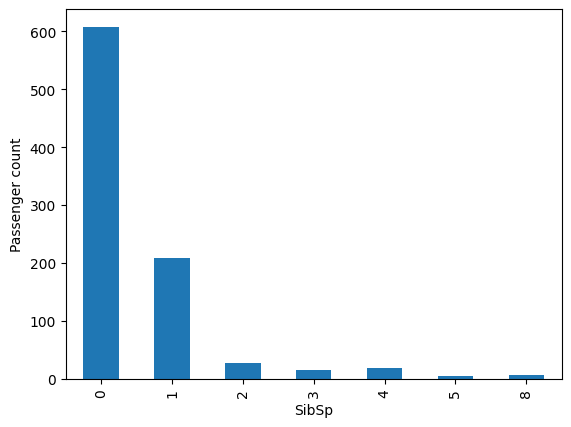

In [129]:
plt = df_train.SibSp.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

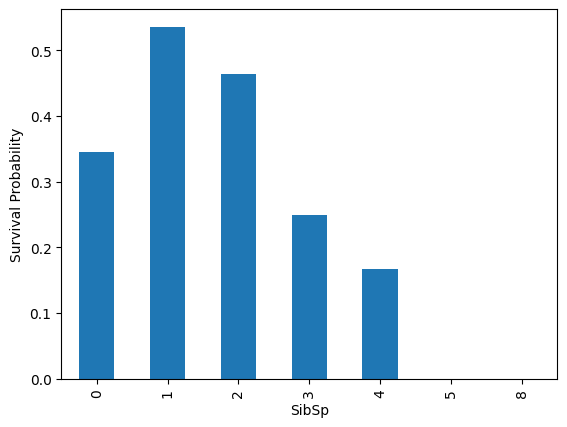

In [130]:
plt = df_train[['SibSp', 'Survived']].groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('SibSp')
plt.set_ylabel('Survival Probability')

### Insight
- The passengers with 1 or 2 sibling has more survival probability.

### Parch - Children/Parents

Text(0, 0.5, 'Passenger count')

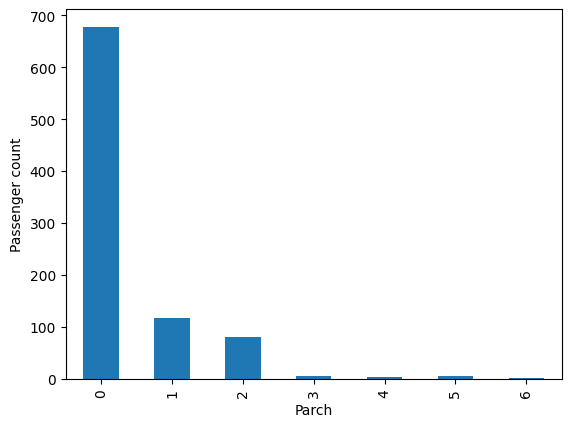

In [131]:
plt = df_train.Parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

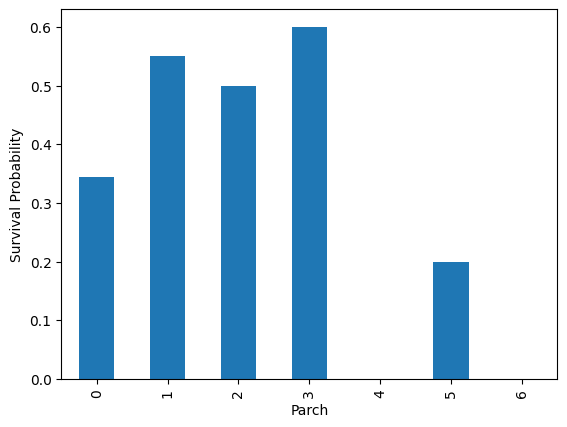

In [132]:
plt = df_train[['Parch', 'Survived']].groupby('Parch')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

### Insight
- Passenger having 3 children has more survival probability

### Embarked vs Pclass

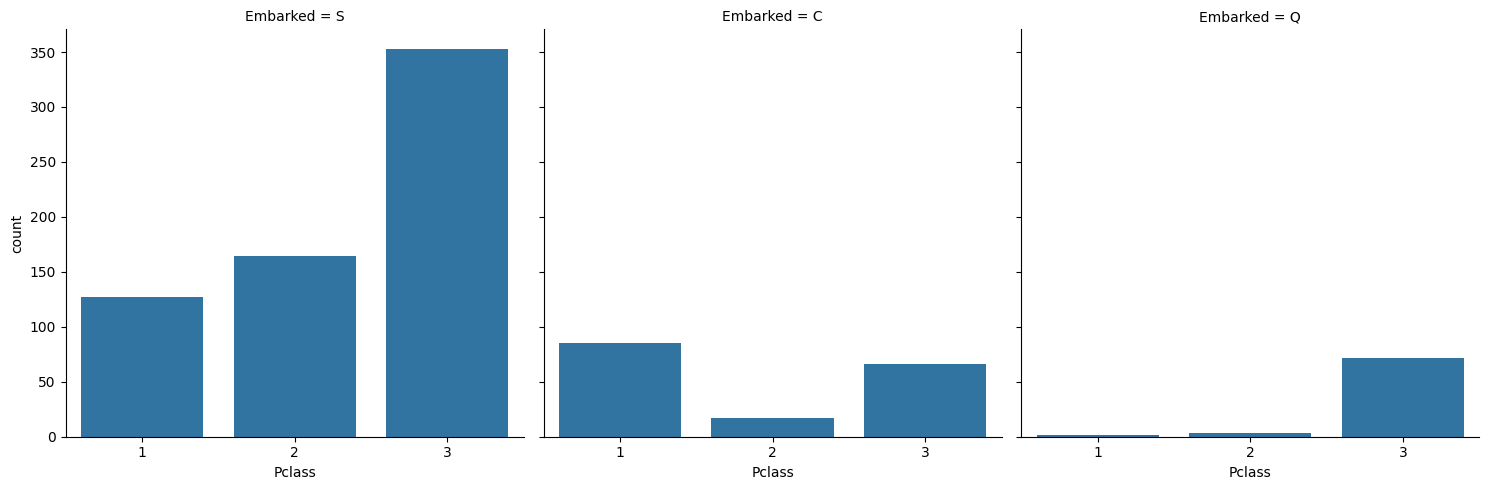

In [133]:
sns.catplot(x='Pclass', col='Embarked', data=df_train, kind='count')

### Pclass vs Sex

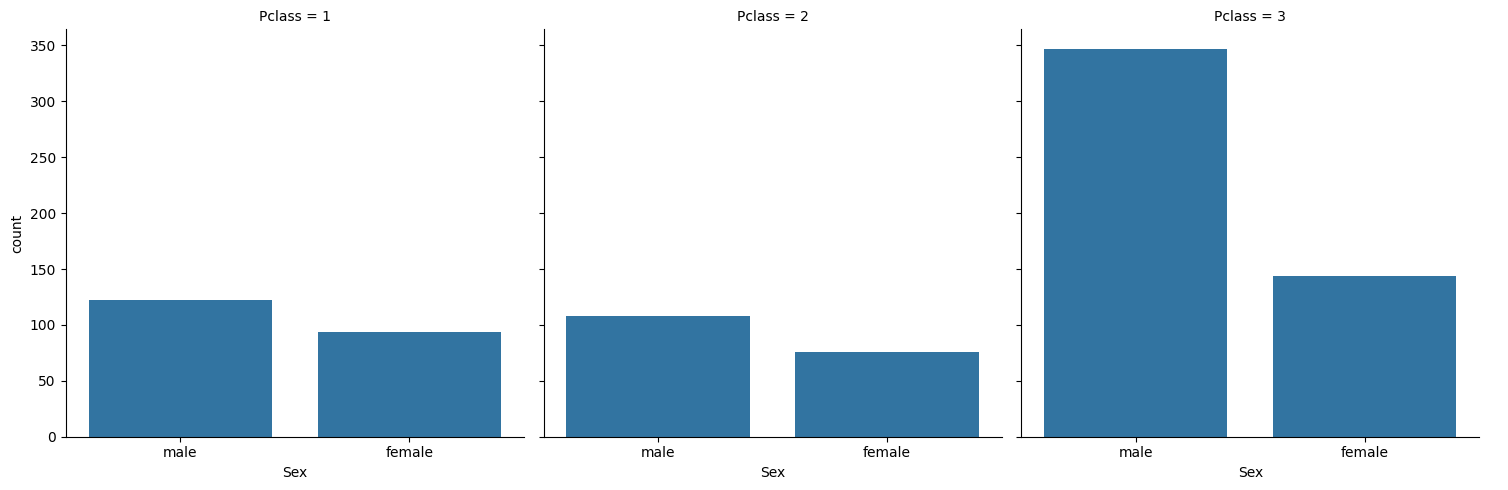

In [134]:
sns.catplot(x='Sex', col='Pclass', data=df_train, kind='count')

### Embarked vs Sex

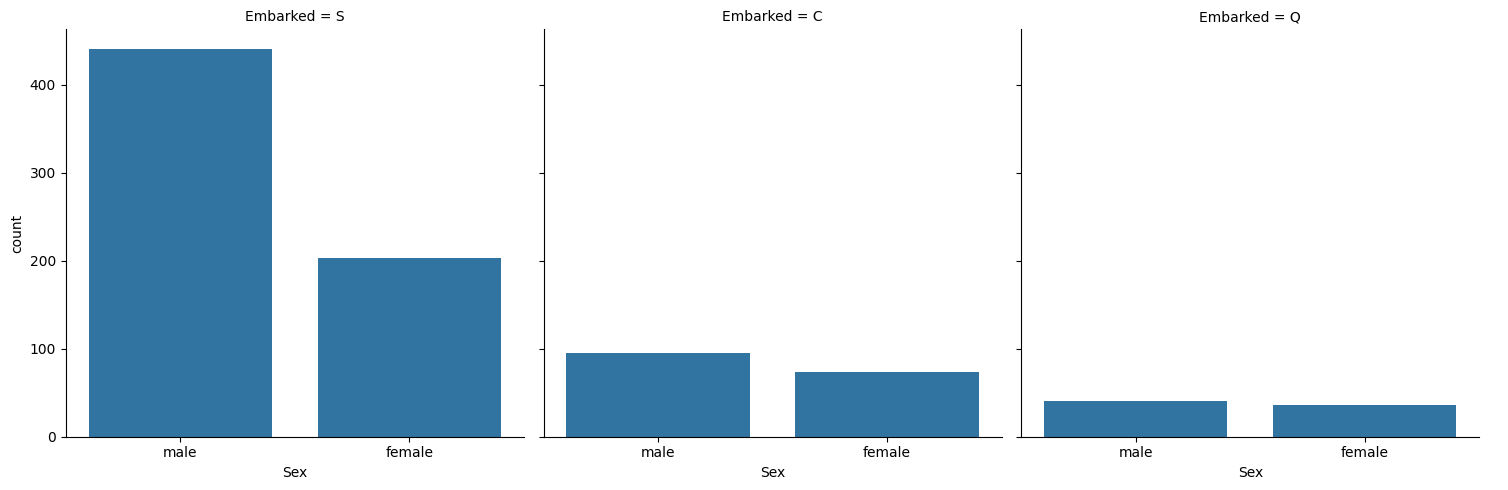

In [135]:
sns.catplot(x='Sex', col='Embarked', data=df_train, kind='count')

## Create Family Size

<Axes: xlabel='FamilySize'>

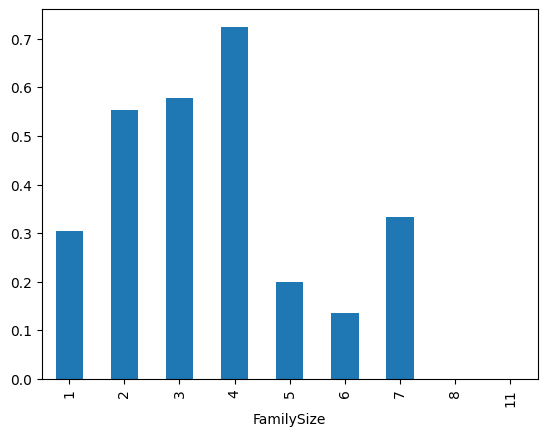

In [136]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_train.groupby("FamilySize")["Survived"].mean().plot(kind="bar")

### Create isAlone

<Axes: xlabel='IsAlone'>

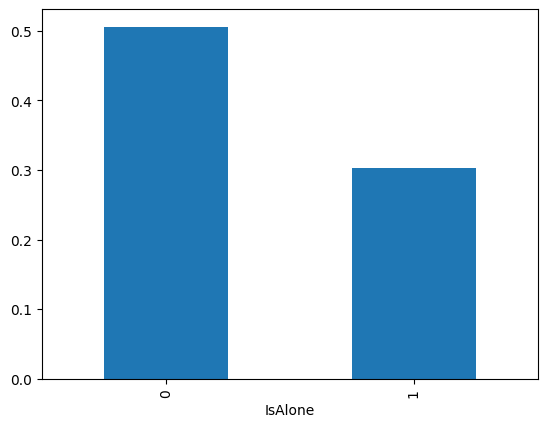

In [137]:
df_train["IsAlone"] = (df_train["FamilySize"] == 1).astype(int)
df_train.groupby("IsAlone")["Survived"].mean().plot(kind="bar")

### Remove unnecessary columns

- We can remove 'Ticket' and 'PassengerId', as they don't contribute 
- Remove 'Cabin' as it has a lot of missing values 

In [138]:
df_train = df_train.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


### Change Embarked and Sex to Numerical value

In [139]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1,1


### Extract Title and drop Name

In [140]:
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_train = df_train.drop(columns='Name')

<Axes: xlabel='Title'>

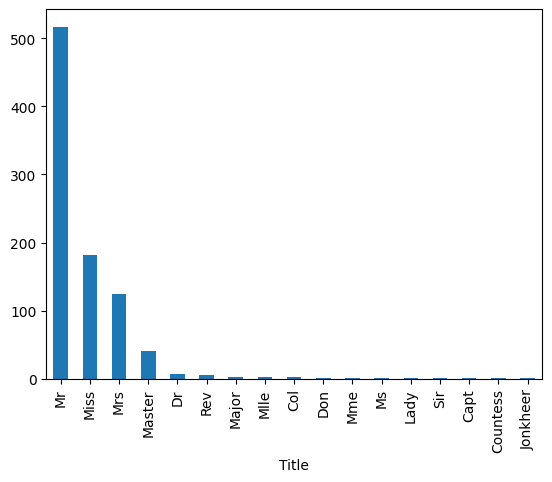

In [141]:
df_train.Title.value_counts().plot(kind='bar')

In [142]:
df_train['Title'] = df_train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

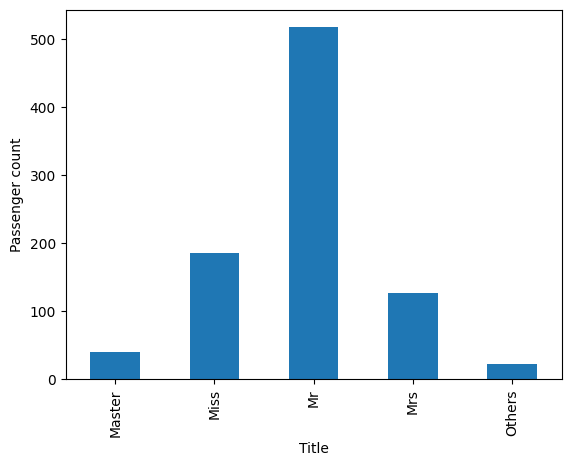

In [143]:
plt = df_train.Title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

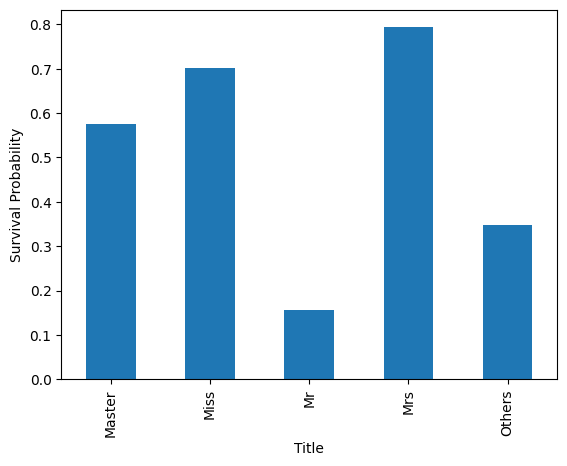

In [144]:
plt = df_train[['Title', 'Survived']].groupby('Title')['Survived'].mean().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

### Insight
- The survival probability for 'Mrs' and 'Miss' is high

## Title to numerical value

In [145]:
df_train['Title'] = df_train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,0,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,0,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,1,2


### Handle missing values

In [146]:
df_train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
FamilySize      0
IsAlone         0
Title           0
dtype: int64

- The two missing values in 'Embarked' will be replaced by the majority class which is 'S', in order to keep the orginal distribution.

In [147]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,0,2
1,1,1,1,38.0,1,0,71.2833,0.0,2,0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,2,0,3
4,0,3,0,35.0,0,0,8.0500,2.0,1,1,2


### Handle missing 'Age' values

### Use correlation
- close to 0 - little or no correlation

In [148]:
df_train[["Age", "Fare", "Sex", "SibSp", "Parch", "Pclass", "Survived", "Embarked"]].corr()

,Age,Fare,Sex,SibSp,Parch,Pclass,Survived,Embarked
Age,1.000000,0.096067,-0.093254,-0.308247,-0.189119,-0.369226,-0.077221,-0.030394
Fare,0.096067,1.000000,0.182333,0.159651,0.216225,-0.549500,0.257307,-0.224719
Sex,-0.093254,0.182333,1.000000,0.114631,0.245489,-0.131900,0.543351,-0.108262
SibSp,-0.308247,0.159651,0.114631,1.000000,0.414838,0.083081,-0.035322,0.068230
Parch,-0.189119,0.216225,0.245489,0.414838,1.000000,0.018443,0.081629,0.039798
Pclass,-0.369226,-0.549500,-0.131900,0.083081,0.018443,1.000000,-0.338481,0.162098
Survived,-0.077221,0.257307,0.543351,-0.035322,0.081629,-0.338481,1.000000,-0.167675
Embarked,-0.030394,-0.224719,-0.108262,0.068230,0.039798,0.162098,-0.167675,1.000000


### Insight
Age ↔ Survived: –0.0505 → Very weak

Age ↔ Sex: –0.091 → Very weak

Age ↔ Embarked: –0.019022 → Very weak

Age ↔ Fare: 0.11 → Very weak

Age ↔ SibSp: –0.310355 → Moderate

Age ↔ Pclass: –0.402251 → Moderate

Age ↔ Parch: –0.187 → Weak–moderate


In [149]:
df_train["Age"] = df_train["Age"].fillna(df_train.groupby(["Pclass", "SibSp", "Parch"])["Age"].transform("median"))
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())  

In [ ]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

## Preprocess test data

In [172]:
df_test = pd.read_csv('../data/raw/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [173]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Remove column and Extract Title

In [174]:
df_test = df_test.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test = df_test.drop(columns='Name')

df_test['Title'] = df_test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')

#convert to Numerical values.
df_test['Title'] = df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

### Convert 'Sex' and 'Embarked' to Numerical values

In [171]:
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [176]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        1
dtype: int64

## Handle missing value

In [177]:
df_test["Age"] = df_train["Age"].fillna(df_train.groupby(["Pclass", "SibSp", "Parch"])["Age"].transform("median"))
df_test.Title = df_test.Title.fillna(df_train.Title.mode()[0])
df_test.Fare = df_test.Fare.fillna(df_train.Fare.mean())

In [178]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

## Create Family Size and IsAlone

In [179]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

In [167]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,3,male,34.5,0,0,7.8292,Q,2.0,1,1
1,3,female,47.0,1,0,7.0000,S,3.0,2,0
2,2,male,62.0,0,0,9.6875,Q,2.0,1,1
3,3,male,27.0,0,0,8.6625,S,2.0,1,1
4,3,female,22.0,1,1,12.2875,S,3.0,3,0


## Split 'train data' and 'test data'

In [204]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns="Survived")
y= df_train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Preprocessed Data

In [205]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
331,1,0,45.5,0,0,28.5000,2.0,1,1,2
733,2,0,23.0,0,0,13.0000,2.0,1,1,2
382,3,0,32.0,0,0,7.9250,2.0,1,1,2
704,3,0,26.0,1,0,7.8542,2.0,2,0,2
813,3,1,6.0,4,2,31.2750,2.0,7,0,1


In [207]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [208]:
X_train.shape

(712, 10)

In [209]:
y_train.shape

(712,)

In [210]:
X_test.shape

(179, 10)

In [212]:
y_test.shape

(179,)

## Save data

In [214]:
df_train.to_csv("../data/preprocessed/train_cleaned.csv", index=False)
df_test.to_csv("../data/preprocessed/test_cleaned.csv", index=False)

## Train model

In [225]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sk_clf = KNeighborsClassifier()
sk_clf.fit(X_train, y_train)



,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [226]:
predictions = sk_clf.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [227]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
accuracy


0.7653631284916201